In [2]:
# Run this code to set up the necessary libraries
# Necessary for both part 1 and part 2
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Part 1 - Bike Sharing

### Meet the Data and the Setting

##### Background  
Bike sharing systems are new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic.  Currently, there are over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.

##### The Dataset

We will be using the daily version of the Capital Bikeshare System dataset. This data set contains information about the daily count of bike rental checkouts in Washington, D.C.’s bikeshare program between 2011 and 2012. It also includes information about the weather and seasonal/temporal features for that day (like whether it was a weekday).
- **day:** Day of the record (relative to day 1:2011-01-01)
- **season:** Season (1:spring, 2:summer, 3:fall, 4:winter)
- **weekday:** Day of the week (0=Sunday, 6=Saturday)
- **workingday:** If day is neither on a weekend nor a holiday this is 1, otherwise this is 0.
- **weathersit:**<br>
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- **temp:** Normalized temperature in Celcius
- **windspeed:** Normalized wind speed
- **casual:** Count of checkouts by casual/non-registered users
- **registered:** Count of checkouts by registered users
- **cnt:** Total checkouts

In [3]:
# Run this code to import the data
import pandas as pd
daily_1 = pd.read_csv("daily-checkouts-1.csv")
daily_2 = pd.read_csv("daily-checkouts-2.csv")

### Data Preparation
**Question 1: Putting the Data Together** 

We have two datasets - one for the year 2011 and another for the year 2012. We would like to put the two datasets together.

- First check consistency of the two datasets. Print the first 8 records of daily_1 and daily_2, correspodingly.
- Obtain and report the column names of daily_1 and daily_2. Are the names the same for the two datasets?
- Create a new dataframe, daily_concat, which is the concatenation of daily_1 and daily_2. 

In [4]:
# Print the first 8 records of daily_1 and daily_2
daily_1.head(8)

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt,year
0,1,1,6,0,2,0.344167,0.160446,331,654,985,2011
1,2,1,0,0,2,0.363478,0.248539,131,670,801,2011
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349,2011
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562,2011
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600,2011
5,6,1,4,1,1,0.204348,0.089565,88,1518,1606,2011
6,7,1,5,1,2,0.196522,0.168726,148,1362,1510,2011
7,8,1,6,0,2,0.165000,0.266804,68,891,959,2011


In [5]:
daily_2.head(8)

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt,year
0,360,1,1,0,1,0.321739,0.239465,430,887,1317,2011.0
1,361,1,2,1,2,0.325000,0.188450,103,1059,1162,2011.0
2,362,1,3,1,1,0.299130,0.293961,255,2047,2302,2011.0
3,363,1,4,1,1,0.248333,0.119412,254,2169,2423,2011.0
4,364,1,5,1,1,0.311667,0.134337,491,2508,2999,2011.0
5,365,1,6,0,1,0.410000,0.220154,665,1820,2485,2011.0
6,366,1,0,0,1,0.370000,0.192167,686,1608,2294,2012.0
7,367,1,1,0,1,0.273043,0.329665,244,1707,1951,2012.0


In [6]:
# Print the column names of daily_1 and daily_2

daily_1.dtypes


day             int64
season          int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
year            int64
dtype: object

In [7]:
daily_2.dtypes

day             int64
season          int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
year          float64
dtype: object

In [ ]:
# Is there consistency between the two datasets?
#The variable names for both the datasets is same. 
#However, the data type for 'year' column is int in daily_1, and float in daily_2

In [8]:
# Create the new dataframe daily_concat
daily_concat=pd.concat([daily_1,daily_2])

**Question 2: Data Preparation** 
- Drop all duplicated records. Save the result as a new dataframe: daily. How many records are dropped?
- How many null values are there under each variable for dataframe: daily? Sort the null value counts from highest to lowest. 
- Read through the data description carefully. Is it okay to drop the variable(s) with null value?
    - If so drop these columns from daily
    - Use the argument inplace=True do .drop() to modify the dataframe daily directly (as opposed to returning a new dataframe)

In [9]:
#Checking for the duplicated records in the combined dataframe 
daily_concat.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
367    False
368    False
369    False
370    False
371    False
Length: 737, dtype: bool

In [10]:
#Saving duplicated rows in df daily_dp
daily_dp=daily_concat[daily_concat.duplicated()]
print(daily_dp)
print(daily_dp.shape)

   day  season  weekday  workingday  weathersit      temp  windspeed  casual  \
0  360       1        1           0           1  0.321739   0.239465     430   
1  361       1        2           1           2  0.325000   0.188450     103   
2  362       1        3           1           1  0.299130   0.293961     255   
3  363       1        4           1           1  0.248333   0.119412     254   
4  364       1        5           1           1  0.311667   0.134337     491   
5  365       1        6           0           1  0.410000   0.220154     665   

   registered   cnt    year  
0         887  1317  2011.0  
1        1059  1162  2011.0  
2        2047  2302  2011.0  
3        2169  2423  2011.0  
4        2508  2999  2011.0  
5        1820  2485  2011.0  
(6, 11)


In [11]:
#checking number of rows in dataset daily_concat
daily_concat.shape

(737, 11)

In [12]:
# Create the dataframe daily which drops all duplicated records
daily=daily_concat.drop_duplicates()

In [13]:
#Checking number of rows in dataset daily_concat
daily.shape

(731, 11)

In [14]:
# How many records were dropped?
#6 duplicate rows were dropped from the database

In [15]:
# Report the null values for each variable in dataframe daily in sorted order from highest to lowest
daily.isnull().sum().sort_values(ascending=False)

year          363
day             0
season          0
weekday         0
workingday      0
weathersit      0
temp            0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [16]:
#Dropping the index='year'
daily.drop(columns='year',inplace=True)

In [17]:
daily

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
367,727,1,4,1,2,0.254167,0.350133,247,1867,2114
368,728,1,5,1,2,0.253333,0.155471,644,2451,3095
369,729,1,6,0,2,0.253333,0.124383,159,1182,1341
370,730,1,0,0,1,0.255833,0.350754,364,1432,1796


In [18]:
# Is it okay to drop the variables with null values (double check data description)?

# From the above results it is evident that the null values are present in the year column. 
# The year column is already a redundant column as we know the data is for the year 2011 and 2012. 
# This differentiation can be made from the day column.


### For the remaining analysis use the dataframe daily

**Question 3: Data Description** 

We have two years' data. Let us consider them separately. (Hint: you may want to use logical indexing for this problem. Based on data description, you can compare variable 'day' with benchmark 365 to determine which year a record belongs.)
- Create and report summary statistics of all variables for records in year 2011. Keep all specifications default. 
- Create and report summary statistics of all variables for records in year 2012. Keep all specifications default.
- We would like to compare the two summary statistics to obtain insights. What variables are interesting to look into? What do you learn by comparing the summary statistics of these variables? 


In [19]:
daily_y1=daily[daily['day']<=365]
#Grouping categorical and quantitative variables separately

#categorical='season', 'weekday', 'workingday', 'weathersit'
cat=['season', 'weekday', 'workingday', 'weathersit']
daily_y1_cat=daily_y1[cat]

#quantitative='temp', 'windspeed', 'casual', 'registered','cnt'
quant=['temp', 'windspeed', 'casual', 'registered','cnt']
daily_y1_quant=daily_y1[quant]


In [20]:
# Report summary statistics for the year 2011
#For Quantitative variables 
daily_y1_quant.describe()

,temp,windspeed,casual,registered,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.486665,0.191403,677.402740,2728.358904,3405.761644
std,0.189596,0.076890,556.269121,1060.110413,1378.753666
min,0.059130,0.022392,9.000000,416.000000,431.000000
25%,0.325000,0.135583,222.000000,1730.000000,2132.000000
50%,0.479167,0.186900,614.000000,2915.000000,3740.000000
75%,0.656667,0.235075,871.000000,3632.000000,4586.000000
max,0.849167,0.507463,3065.000000,4614.000000,6043.000000


In [52]:
#For Categorical variables 
for n in daily_y1_cat:
    counts=daily_y1_cat[n].value_counts()
    percentages = round(counts / len(daily_y1_cat) * 100, 2)
    print(percentages)

3    25.75
2    25.21
1    24.66
4    24.38
Name: season, dtype: float64
6    14.52
0    14.25
1    14.25
2    14.25
3    14.25
4    14.25
5    14.25
Name: weekday, dtype: float64
1    68.49
0    31.51
Name: workingday, dtype: float64
1    61.92
2    33.97
3     4.11
Name: weathersit, dtype: float64


In [24]:
# Report summary statistics for the year 2012
daily_y2=daily[daily['day']>365]
#Grouping categorical and quantitative variables separately

#categorical='season', 'weekday', 'workingday', 'weathersit'
cat=['season', 'weekday', 'workingday', 'weathersit']
daily_y2_cat=daily_y2[cat]

#quantitative='temp', 'windspeed', 'casual', 'registered','cnt'
quant=['temp', 'windspeed', 'casual', 'registered','cnt']
daily_y2_quant=daily_y2[quant]

In [25]:
# Report summary statistics for the year 2012
daily_y2_quant.describe()

,temp,windspeed,casual,registered,cnt
count,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.504081,0.189572,1018.483607,4581.450820,5599.934426
std,0.176112,0.078194,758.989897,1424.331846,1788.667868
min,0.107500,0.046650,2.000000,20.000000,22.000000
25%,0.347708,0.133721,429.750000,3730.500000,4369.000000
50%,0.514167,0.174750,904.500000,4776.500000,5927.000000
75%,0.653959,0.231196,1262.000000,5663.000000,7011.250000
max,0.861667,0.441563,3410.000000,6946.000000,8714.000000


In [50]:
for n in daily_y2_cat:
    counts=daily_y2_cat[n].value_counts()
    percentages = round(counts / len(daily_y2_cat) * 100, 2)
    print(percentages)


3    25.68
2    25.14
1    24.86
4    24.32
Name: season, dtype: float64
0    14.48
1    14.48
2    14.21
3    14.21
4    14.21
5    14.21
6    14.21
Name: weekday, dtype: float64
1    68.31
0    31.69
Name: workingday, dtype: float64
1    64.75
2    33.61
3     1.64
Name: weathersit, dtype: float64


In [ ]:
# Discuss your insights from these summary statistics.

#In general we can say that the company has a greater number of registered users as compared to casual users.
#There was not a single day when the company had 0 users (Customers)
#The number of users (Casual and Registered) have gone up significantly from the year 2011 to 2012
#For the column workingday we see that majority are working days.
#We see maximum number of days are clear or partly cloudy 



**Question 4: Compare Distributions**

Use overlapped histograms to compare the distributions of registered and casual checkouts. 
- For registered checkouts, let number of bins be 15, and color be -b- (blue). 
- For casual checkouts, let number of bins be 8, and color be -r- (red). 
- Let transparency be 0.7 for both histograms. Include appropriate labels for x-axis and y-axis. Also include appropriate legends.
- What insights can you get?

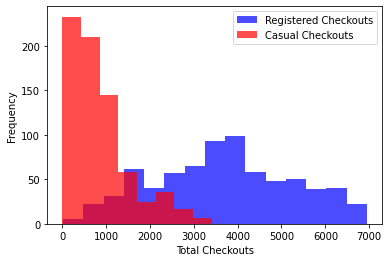

In [53]:
# Create the overlapped histogram plot
## Overlapped Histogram 
# Logical Indexing: 
registered_chk=daily.loc[:,'registered']

casual_chk=daily.loc[:, 'casual']

# Plots
plt.hist(registered_chk, bins=15, color='b', label='Registered Checkouts', alpha=0.7)
plt.hist(casual_chk, bins=8, color='r', label='Casual Checkouts', alpha=0.7)
plt.xlabel('Total Checkouts')
plt.ylabel('Frequency')
plt.legend()

In [60]:
print(registered_chk.min())
print(registered_chk.max())


20
6946


In [58]:
print(casual_chk.max())
print(casual_chk.min())


3410
2


In [ ]:
# Discuss your insights
#From the above two normal curves we make make the following observations:

#Casual Checkouts
#1. The distribution of  Casual Checkouts ranges from '2' to max of '3410' per day.
#2. Distribution is skewed to the right

#Registered Checkouts
#1. The distribution of  registered Checkouts from '20' to max of '6946' per day.
#2. Distribution is approximately normally distributed. This suggests there are more registered users who use bike sharing
#system regularly than casual users, suggesting the registered users makeup the majority of the customers


**Question 5: Boxplot** 

From question 4, we have found that although the distribution of registered and casual users differ significantly, each distribution seems to be unimodal (one peak).  Thus, boxplots can be informative in this case.

- Create a boxplot to show the registered number of checkouts under different weathersit and workingday. What insights do you get?
- Create a boxplot to show the casual number of checkouts under different weathersit and workingday. What insights do you get?
- Based on the figures, do registered users and casual users behave differently? If yes, can you provide some intuitions behind this?
- *Hint: Use sns.boxplot() for this problem. To consider two different category groups, we use parameter 'hue'. Specifically, set x to weathersit, and hue to workingday.*

Text(0.5, 1.0, 'Boxplot of registered #of checkouts under diff weathersit and workingday ')

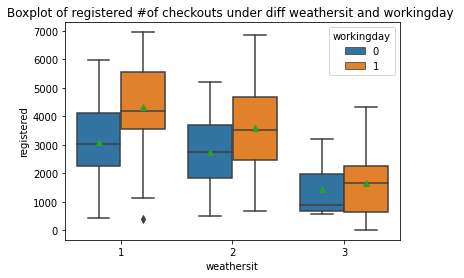

In [81]:
# Boxplot for registered checkouts under different workingday
sns.boxplot(data = daily, x = 'weathersit',  y = 'registered', hue='workingday', showmeans = True)
plt.title('Boxplot of registered #of checkouts under diff weathersit and workingday ')
#Discuss Insights
#From the output we can highlight a few points as:
#If the weather is clear we can see more numbers of customers compared to when the wheather is misty, and least when
#the weather is snow
#The number of customers is larger on a working day compared to when it is not a working day

Text(0.5, 1.0, 'Boxplot of casual #of checkouts under diff weathersit and workingday ')

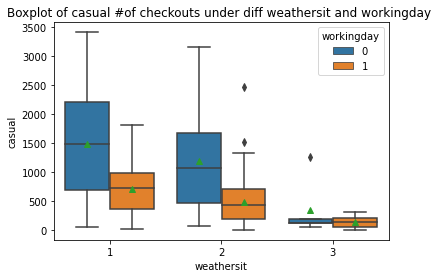

In [82]:
# Boxplot for casual checkouts under different workingday
sns.boxplot(data = daily, x = 'weathersit',  y = 'casual', hue='workingday', showmeans = True)
plt.title('Boxplot of casual #of checkouts under diff weathersit and workingday ')
# Discuss insights
#From the output we can highlight a few points as:
#Simila to the registered users if the weather is clear clear we can see more numbers of customers compared to when the wheather is misty, and least when
#the weather is snow
#The number of customers is smaller on a working day compared to when it is a working day

In [ ]:
# Based on the plots, do registered and casual users behave differently?  What is some intuition for your response?
#Yes it is clear from the above two plots that registered and casual users behave differently:
#1. Registered users tend to use the serive on a working day while the casual users tend to use the servies on  a non working day.
#2. We can say that the registered users comprise of more number of office goers


**Question 6: Explore Relationships with Multidimensional Information.** 
- Create a scatter plot  of the daily count of bikes that were checked out by **casual/non-registered** users (y) against the temperature (x). 
- Set the color based on whether it is a working day. Set the transparency to 0.7. 
- Include appropriate labels for x-axis and y-axis, and colorbar. *Hint: use plt.colorbar(ticks = [0,1]) to change the ticks.*
- What insights can you get?

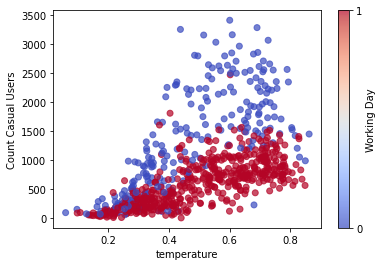

In [84]:
# Create the scatter plot
# Scatter plot with color
plt.scatter(x=daily['temp'], y=daily['casual'], c=daily['workingday'], cmap='coolwarm', alpha=0.7)

plt.xlabel('temperature')
plt.ylabel('Count Casual Users')

plt.colorbar(ticks=[0,1], label='Working Day')
# Discuss your insights
#We can see that there is a positive correlation between temperature and the number of bikes checked out by casual/non-registered users.
#As the temperature increases, more bikes are checked out.
#the plot shows that on non working days (represented by blue points), there is a greater number of bikes


## Part 2 - Social Network

For this part we will carry out some rudimentary social network analysis.  To start let's understand how we can represent (some aspects of) a social network in Python.  Dictionaries are a good tool for this.  Let's look at the example below.


In [71]:
example_network = {'Alice': ['Bob', 'Cheryl', 'Daniel'], 
                   'Bob': ['Alice', 'Daniel'], 
                   'Cheryl': ['Alice'], 
                   'Daniel': ['Alice', 'Bob']}

Here in example_network there are 4 users - Alice, Bob, Cheryl, and Daniel - which are the keys in our dictionary.  The values corresponding to each key is a list of their friends (other users/keys in the dictionary).  Here we think of the network as being *undirected* - if x is a friend of y, then y must also be a friend of x.  This represents social networks like Facebook where friendship is reciprocal.  Other networks where you "follow" users (but that does not entail the other users "follow" you would be represented by a *directed* network.  We can visualize the above network as follows:
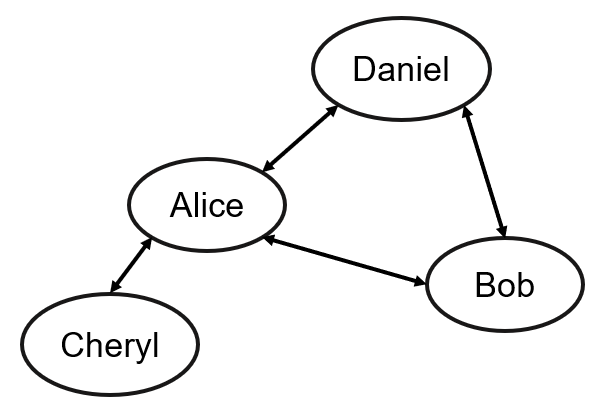

Real world networks often display interesting characteristics that are different from many popular models for network generation.  In particular, we will explore the distribution of *degrees*, that is the number of friends of each user in the network.  The following code will load in a real world network derived from a social networking site (courtesy of the Stanford Network Analysis Project).  The users/nodes in the network represent pages and corresponding pages are connected/friends with each other if they link to each other.  Run the code below to load the network into a dictionary as in the example.  Note how many web pages are in the network and how many connections there are.

In [72]:
def load_network(filename):
    # Initialize the dictionary
    network = {}
    with open(filename) as network_file:
        # The first line of the file is a header, which we can skip
        header = network_file.readline()
        # counter variable for number of connections
        num_connections = 0
        for line in network_file:
            # Each line is of the form "id1,id2"
            # We can get each id by splitting along the comma
            values = line.split(',') 
            u = values[0]
            v = values[1]
            if u not in network:
                network[u] = [v]
            else:
                network[u].append(v)
            if v not in network:
                network[v] = [u]
            else:
                network[v].append(u)
                
            # Update num_connections
            num_connections += 1
    return network, num_connections

network, num_connections = load_network('network_edges.csv')

print("Number of users/pages = ", len(network.keys()))
print("Number of connections = ", num_connections)

Number of users/pages =  36999
Number of connections =  171002


**Question 7: Compute the Degree Distribution** 
The degree of a user in a network is its number of friends.  Let's write a function to aggregate this information.

- Write a function called compute_degrees which takes in a network as a parameter/argument.  
    - You may assume that network is a dictionary formatted as example_network above (but potentially larger and with different keys).  Error handling is not necessary.
    - The output of the function should either be a dictionary or a numpy array containing the degree of each user in the input network.
        - If you use a dictionary, then each user is a key and its corresponding value is its degree.
    - For the input example_network above we should have the following output:
        - If using a dictionary: {'Alice': 3, 'Bob':2, 'Cheryl':1, 'Daniel':2}
        - If using a numpy array: array([3, 2, 1, 2]) (although for our purposes the order doesn't matter)
        - You can use example_network to check your code

In [73]:
# Write the function compute_degrees
def compute_degrees(network):
    my_dict={}
    for values in network:
        my_dict[values]=len(network[values])
    return my_dict


In [74]:
print(compute_degrees(example_network))

{'Alice': 3, 'Bob': 2, 'Cheryl': 1, 'Daniel': 2}


**Question 8: Visualize using a Histogram** 

- Apply the function you wrote from the previous part to get the degree distribution of the network we loaded above.
- Create a histogram (with proper axis labels) of the degree distribution.
    - Set the number of bins to 15
- Now create a new dictionary/numpy array which instead stores the logarithm of the degree distribution and create a histogram for this.  Use the same settings as before.  Remember to properly label the axes.
    - Feel free to use base 2, base e, or base 10 for the logarithm
- Do you have any insights about the degree distribution versus when we took the logarithm?  Discuss these.

In [75]:
# Apply the function to get the degree distribution
dict_network=compute_degrees(network)


Text(0, 0.5, 'Frequency')

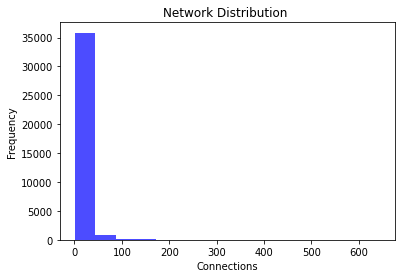

In [79]:
# Create a histogram of the degree distribution
x=dict_network.keys()
y=dict_network.values()
# Create a histogram
plt.hist(y, bins=15, color='b', alpha=0.7)

# Set the title and labels
plt.title("Network Distribution ")
plt.xlabel("Connections")
plt.ylabel("Frequency")


[Text(0.5, 0, 'Degree of Users'), Text(0, 0.5, 'Frequency')]

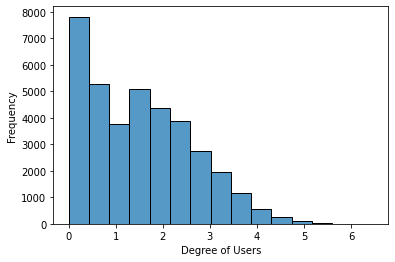

In [90]:
# Take the logarithm of the degree distribution and create a histogram for this
log_y = [np.log(i) for i in y]
fig = sns.histplot(log_y, bins = 15 )
fig.set(xlabel = 'Degree of Users', ylabel = 'Frequency')

In [ ]:
# Discuss your insights
#Comparing the above data and both the histograms, taking the logarithm of a normal distribution is useful, as in this case
#we are dealing with variables that span a wide range of values. 

#From the above histogram we can see the curve id skewed to the right meaning there are more people with fewer number of connections (degree)
#and as the degree increases the frequency goes down 

#Overall, taking the logarithm of a normally distributed variable can be a useful tool for data analysis 
#and can help to make the data more manageable and easier to work with,
#particularly when dealing with variables that span a wide range of values.
